# FFT in python

We aim to generate a sine wave in python with, 
for example, a single frequency of 20 Hz. The sine wave amplitude is a.  We now determine the sampling rate  that should be higher than twice the frequency of signal (Nyquist theorem). 
You can use phase also for your sine signal as 
$y=\sin(2\pi f t +\phi)$

In [8]:
def setup_plot(title='', x_label='', y_label='', fig_size=None):
    
    if fig_size is None:
        fig,ax = plt.subplots(1,1,figsize=(8,4))
    else:
        fig, ax = plt.subplots(1,1,figsize=fig_size) 
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def gen_wave(f,dt,a,phase,N):
    """
    Generate a sine wave signal
    Input parameters:
    f : frequency of sine wave in Hertz
    dt: time step 
    a: wave amplitude
    phase : phase in radians
    N : number of points 
    
    Outputs:
    (t,y) : tuple output
    Example:
    f=10; fs=40*f;
    phase = np.pi/4
    num_cycle = 4;
    (t,g) = gen_wave(f,fs,phase,num_cycle)
    """
    t = np.linspace(0.0, N*dt, N)
    y = a*np.sin(2.0*np.pi*f*t+phase) #
    return (t,y) 

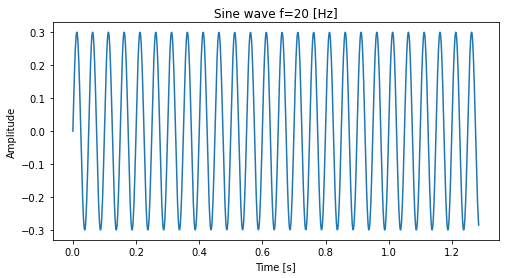

In [17]:
"""
Simulate a sine wave
"""
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt # library for plotting

f = 20          # frequency of sine wave
dt = 1/800.0       # sampling frequency
phase = 0.0*np.pi/4 # phase shift in radians
N = 1028;  # cycles of sine wave
a=0.3;          # sine wave amplitude

freq = fftfreq(N, dt)
fs=freq[1]-freq[0]

(t,y) = gen_wave(f,dt,a,phase,N) 
 
setup_plot(title='Sine wave f='+str(f)+' [Hz]', x_label='Time [s]', y_label='Amplitude', fig_size=None)
plt.plot(t,y) # plot using pyplot library from matplotlib package
plt.show() 

# From time domain to frequency domain


We carry out this transformation using Fast  Fourier Transform (FFT) 
which is an efficient implementation of Discrete Fourier Transform  (DFT). 
Typically, the number of points  is taken as power of 2 in the FFT computations.
The DFT values are complex and we can plot then its amplitude 
to identify the frequency of our generated sine wave. FFT in python can be done either numpy.fft or scipy.fftpack

/Users/mba098/Documents/Mostafa/Software/Conda/miniconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


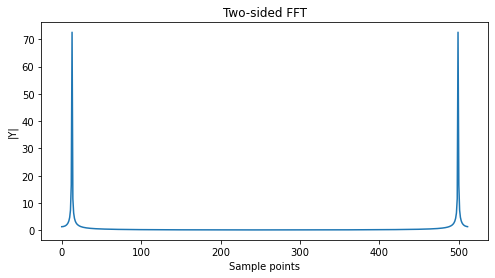

In [24]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

nfft=512 # umber of points in DFT
Y=fft(y,nfft) # compute complex DFT using FFT
xvalues=range(nfft) # DFT sampling points
 
    
setup_plot(title='Two-sided FFT', x_label='Sample points', y_label='|Y|', fig_size=None)
plt.plot(xvalues,np.abs(Y))
fig.show()


We now focus on the accurate representations of x- and y-axis here. 
In order to extract the location of sine wave frequency on the x-axis we conduct a normalization over sampling points. First normalize the sampling points to unity:

$xvalues\leftarrow xvalues/nfft$
    

/Users/mba098/Documents/Mostafa/Software/Conda/miniconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


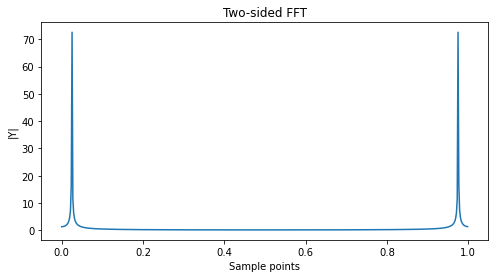

In [25]:
nfft=512; # number of points in DFT
Y=fft(y,nfft); # compute complex DFT using FFT
xvalues=np.arange(nfft)/nfft; # DFT normalized sampling points
setup_plot(title='Two-sided FFT', x_label='Sample points', y_label='|Y|', fig_size=None)
plt.plot(xvalues,np.abs(Y))
fig.show()


The side lobes are due to spectral leakage.
As you observe, the values on x-axis are all positive and not representing the correct frequency on both positive  and negative frequency axes. We will center DFT values at the middle of x-axis by MATLAB 
 
 $xvalues \leftarrow (-nfft/2:nfft/2-1)/nfft$

/Users/mba098/Documents/Mostafa/Software/Conda/miniconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


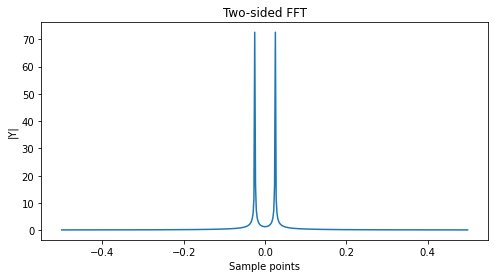

In [26]:
from scipy.fftpack import fft,fftshift



nfft=512;                # number of points in DFT
Y=fftshift(fft(y,nfft)); # compute complex DFT using FFT
xvalues=np.arange(-nfft/2,nfft/2)/nfft; # DFT normalized sampling points
setup_plot(title='Two-sided FFT', x_label='Sample points', y_label='|Y|', fig_size=None)
plt.plot(xvalues,np.abs(Y))
fig.show()


Still x-axis does not represent frequency in Hz. We can convert xvalues to frequency in Hz by
$freq=f_s(-nfft/2:nfft/2-1)/nfft$


/Users/mba098/Documents/Mostafa/Software/Conda/miniconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


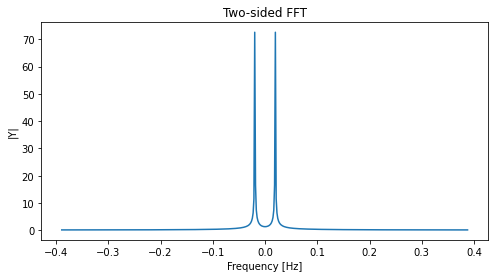

In [27]:
from scipy.fftpack import fft,fftshift

nfft=512; # number of points in DFT
Y=fftshift(fft(y,nfft)); # compute complex DFT using FFT
freq=fs*np.arange(-nfft/2,nfft/2)/nfft; # Frequency [Hz]
setup_plot(title='Two-sided FFT', x_label='Frequency [Hz]', y_label='|Y|', fig_size=None)
plt.plot(freq,np.abs(Y))
fig.show()


Vertical axis does not show the correct amplitude of signal which is 0.3. To get it correct, we scale the vertical axis by proper scaling factor ( $1/{nfft}$ ) as



NameError: name 'fig' is not defined

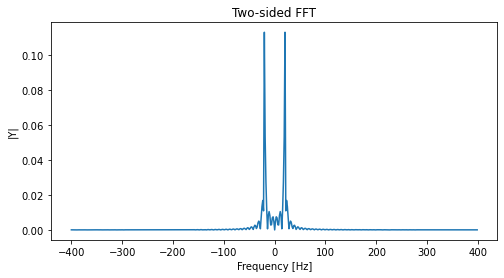

In [14]:
from numpy.fft import fft as fftnp
from numpy.fft import fftshift as fftshiftnp
from scipy.fftpack import fft, fftfreq, fftshift

nfft=512; # number of points in DFT
Y=fftshift(fft(y,nfft)); # compute complex DFT using FFT
freq = fftshift(fftfreq(nfft, dt))
setup_plot(title='Two-sided FFT', x_label='Frequency [Hz]', y_label='|Y|', fig_size=None)
plt.plot(freq,1.0/nfft *np.abs(Y))
fig.show()


# Check sampling frequency (Nyquist frequency)

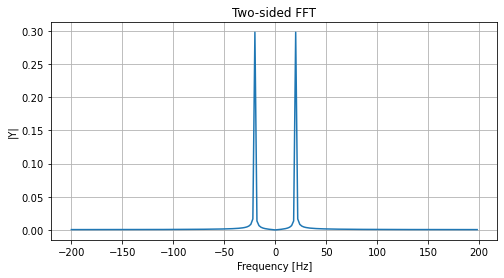

In [23]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
import matplotlib.pyplot as plt
# number of signal points
N = 200
# sample spacing
dt = 1.0 / (2.0*N)
a=0.3
f=20
phase=0

(t,y) = gen_wave(f,dt,a,phase,N) 
Y = fftshift(fft(y))
freq = fftshift(fftfreq(N, dt))
setup_plot(title='Two-sided FFT', x_label='Frequency [Hz]', y_label='|Y|', fig_size=None)
plt.plot(freq, 2.0/N * np.abs(Y))
plt.grid()
plt.show()